In [9]:
import pandas as pd
df = pd.read_csv("Tasas_de_inter_s_activas_por_tipo_de_cr_dito_20240222.csv")
df.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,22,INSTITUCIÓN OFICIAL ESPECIAL,8,Fondo Nacional del Ahorro,27/10/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,50539354.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor nuevo en la entidad,10.0,52001.0
1,4,CF-COMPAÑÍA DE FINANCIAMIENTO,117,Credifamilia,01/07/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,66394327.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,17/11/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,83953304.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,10.0,25175.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,13/10/2023,Natural,Femenino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,36489064.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,4755.0,41359.0
4,1,BC-ESTABLECIMIENTO BANCARIO,42,Scotiabank Colpatria S.A.,09/12/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,320397727.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Tipo_Entidad', 'Nombre_Tipo_Entidad', 'Codigo_Entidad',
       'Nombre_Entidad', 'Fecha_Corte', 'Tipo_de_persona', 'Sexo',
       'Tamaño_de_empresa', 'Tipo_de_crédito', 'Tipo_de_garantía',
       'Producto de crédito', 'Plazo de crédito',
       'Tasa_efectiva_promedio_ponderada', 'margen_adicional',
       'Montos_desembolsados', 'Numero_de_creditos_desembolsados',
       'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa',
       'Rango_monto_desembolsado', 'Clase_deudor', 'Codigo_CIIU',
       'Codigo_Municipio'],
      dtype='object')

In [13]:
df['Nombre_Tipo_Entidad'].unique()

array([22,  4,  1, 32])

In [14]:
df.drop(columns=['Tipo_Entidad', 'Codigo_Entidad','Tamaño_de_empresa','Tipo_de_crédito','Antiguedad_de_la_empresa','Codigo_CIIU','Codigo_Municipio'], inplace=True)

In [15]:
df.head()

,Nombre_Tipo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor
0,INSTITUCIÓN OFICIAL ESPECIAL,Fondo Nacional del Ahorro,27/10/2023,Natural,Masculino,Garantia idónea o no idónea,Adquisición de vivienda vis (colocación en pesos),Más de 15 años y hasta 20 años,8.30,0.0,50539354.0,1,Sin información (1),FS,Hasta 135 SMLMV,Deudor nuevo en la entidad
1,CF-COMPAÑÍA DE FINANCIAMIENTO,Credifamilia,01/07/2022,Natural,Masculino,Garantia idónea o no idónea,Adquisición de vivienda vis (colocación en pesos),Más de 7 años y hasta 15 años,19.86,0.0,66394327.0,3,NaN,NaN,NaN,NaN
2,BC-ESTABLECIMIENTO BANCARIO,Banco de Bogotá,17/11/2023,Natural,Masculino,Garantia idónea o no idónea,Adquisición de vivienda vis (colocación en pesos),Más de 15 años y hasta 20 años,15.12,0.0,83953304.0,1,Sin información (1),FS,Hasta 135 SMLMV,Deudor de la entidad
3,BC-ESTABLECIMIENTO BANCARIO,Bancolombia,13/10/2023,Natural,Femenino,Garantia idónea o no idónea,Adquisición de vivienda vis (colocación en uvr),A más de 20 años,8.80,0.0,36489064.0,1,Sin información (1),FS,Hasta 135 SMLMV,Deudor de la entidad
4,BC-ESTABLECIMIENTO BANCARIO,Scotiabank Colpatria S.A.,09/12/2022,Natural,Masculino,Garantia idónea o no idónea,Adquisición de vivienda vis (colocación en pesos),Más de 7 años y hasta 15 años,16.93,0.0,320397727.0,4,NaN,NaN,NaN,NaN


In [17]:
df.drop(columns=['Rango_monto_desembolsado','Grupo_Etnico','Tipo_de_Tasa','Clase_deudor'], inplace=True)

In [20]:
df.notna().sum()

Nombre_Tipo_Entidad                 62593
Nombre_Entidad                      62593
Fecha_Corte                         62593
Tipo_de_persona                     62593
Sexo                                62593
Tipo_de_garantía                    62593
Producto de crédito                 62593
Plazo de crédito                    62593
Tasa_efectiva_promedio_ponderada    62593
margen_adicional                    62593
Montos_desembolsados                62593
Numero_de_creditos_desembolsados    62593
dtype: int64

In [22]:
df.columns = df.columns.str.lower()


In [24]:
df.groupby(['nombre_tipo_entidad']).tasa_efectiva_promedio_ponderada.mean().sort_values(ascending=False).head()

nombre_tipo_entidad
COOPERATIVAS DE CARÁCTER FINANCIERO    17.072843
CF-COMPAÑÍA DE FINANCIAMIENTO          15.143069
BC-ESTABLECIMIENTO BANCARIO            14.988661
INSTITUCIÓN OFICIAL ESPECIAL            9.850346
Name: tasa_efectiva_promedio_ponderada, dtype: float64

In [25]:
df[df.nombre_tipo_entidad=='BC-ESTABLECIMIENTO BANCARIO'].groupby(['nombre_entidad']).tasa_efectiva_promedio_ponderada.mean().sort_values(ascending=False).head()

nombre_entidad
Mibanco S.A.              21.204691
Banco Unión               18.163220
Banco Caja Social S.A.    17.076767
Itaú                      16.612759
Banco de Occidente        16.579890
Name: tasa_efectiva_promedio_ponderada, dtype: float64

In [32]:
loan_proportion = df['sexo'].value_counts() / len(df)
print(loan_proportion)


sexo
Masculino     0.509530
Femenino      0.490247
No binario    0.000224
Name: count, dtype: float64


In [38]:
pd.options.display.float_format = '{:,.3f}'.format
df.groupby(['sexo']).montos_desembolsados.mean().sort_values(ascending=False).head()

sexo
Masculino    585,913,875.379
Femenino     529,457,729.520
No binario   143,431,752.429
Name: montos_desembolsados, dtype: float64

In [39]:
mount_mean = df['montos_desembolsados'].mean()
print(mount_mean)

558137477.9937241


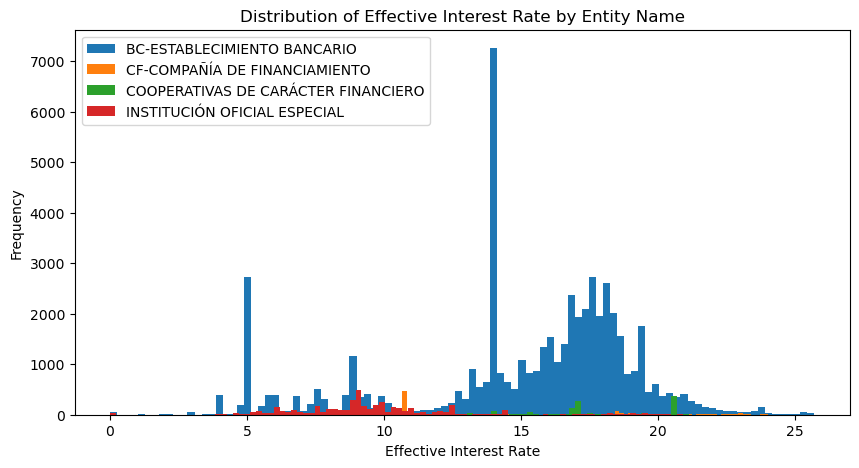

In [50]:
import matplotlib.pyplot as plt

df.groupby('nombre_tipo_entidad')['tasa_efectiva_promedio_ponderada'].plot.hist(bins=100, figsize=(10, 5))
plt.legend()
plt.xlabel('Effective Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Effective Interest Rate by Entity Name')
plt.show()


In [54]:
prestamos_bancos = df.groupby('nombre_entidad')['montos_desembolsados'].agg(['sum']).sort_values(by='sum',ascending=False)
prestamos_bancos

,sum
nombre_entidad,
Banco Davivienda,"9,921,378,480,977.221"
Bancolombia,"7,531,707,482,536.870"
Banco de Bogotá,"3,891,809,405,495.000"
BBVA Colombia,"3,818,857,137,591.840"
Banco Caja Social S.A.,"2,233,536,650,311.000"
Fondo Nacional del Ahorro,"1,975,124,403,161.370"
Scotiabank Colpatria S.A.,"1,827,653,785,298.050"
Banco de Occidente,"1,269,652,699,829.000"
Itaú,"665,680,228,661.230"


In [55]:
df['fecha_corte'].unique()

array(['27/10/2023', '01/07/2022', '17/11/2023', '13/10/2023',
       '09/12/2022', '08/09/2023', '21/07/2023', '28/07/2023',
       '29/07/2022', '24/11/2023', '20/10/2023', '03/11/2023',
       '16/12/2022', '23/09/2022', '05/08/2022', '22/12/2023',
       '10/11/2023', '18/11/2022', '28/10/2022', '07/04/2023',
       '12/08/2022', '01/09/2023', '06/10/2023', '29/09/2023',
       '31/03/2023', '23/06/2023', '07/10/2022', '25/11/2022',
       '10/03/2023', '26/05/2023', '01/12/2023', '28/04/2023',
       '25/08/2023', '30/06/2023', '19/05/2023', '08/07/2022',
       '04/08/2023', '03/02/2023', '03/03/2023', '21/04/2023',
       '30/09/2022', '02/12/2022', '17/02/2023', '07/07/2023',
       '10/02/2023', '15/07/2022', '12/05/2023', '02/09/2022',
       '23/12/2022', '22/09/2023', '24/02/2023', '11/11/2022',
       '09/09/2022', '14/10/2022', '02/06/2023', '15/09/2023',
       '06/01/2023', '18/08/2023', '20/01/2023', '13/01/2023',
       '04/11/2022', '05/01/2024', '26/08/2022', '24/03

<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='sexo'>

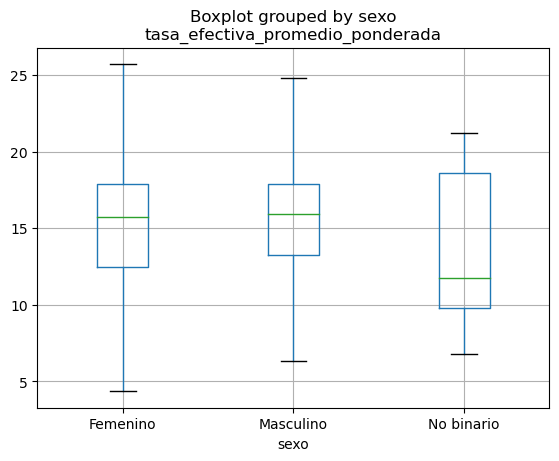

In [57]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='sexo', showfliers=False)

<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='nombre_tipo_entidad'>

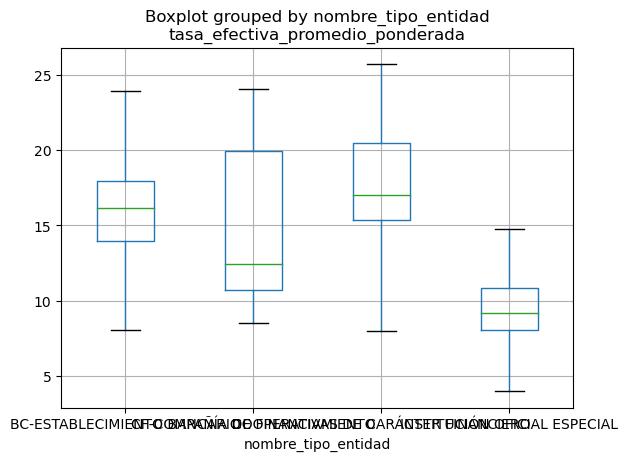

In [60]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='nombre_tipo_entidad', showfliers=False)

array([[<Axes: title={'center': 'A más de 20 años'}>,
        <Axes: title={'center': 'Más de 15 años y hasta 20 años'}>],
       [<Axes: title={'center': 'Más de 5 años y hasta 7 años'}>,
        <Axes: title={'center': 'Más de 7 años y hasta 15 años'}>],
       [<Axes: title={'center': 'Vivienda hasta 5 años'}>, <Axes: >]],
      dtype=object)

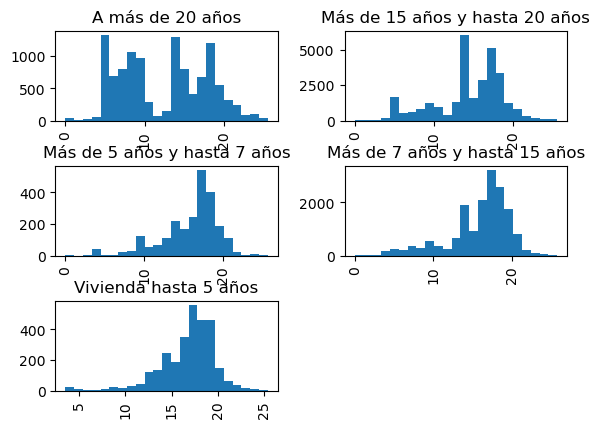

In [78]:
import matplotlib.pyplot as plt

df.hist(column='tasa_efectiva_promedio_ponderada', by='plazo de crédito', bins=23)

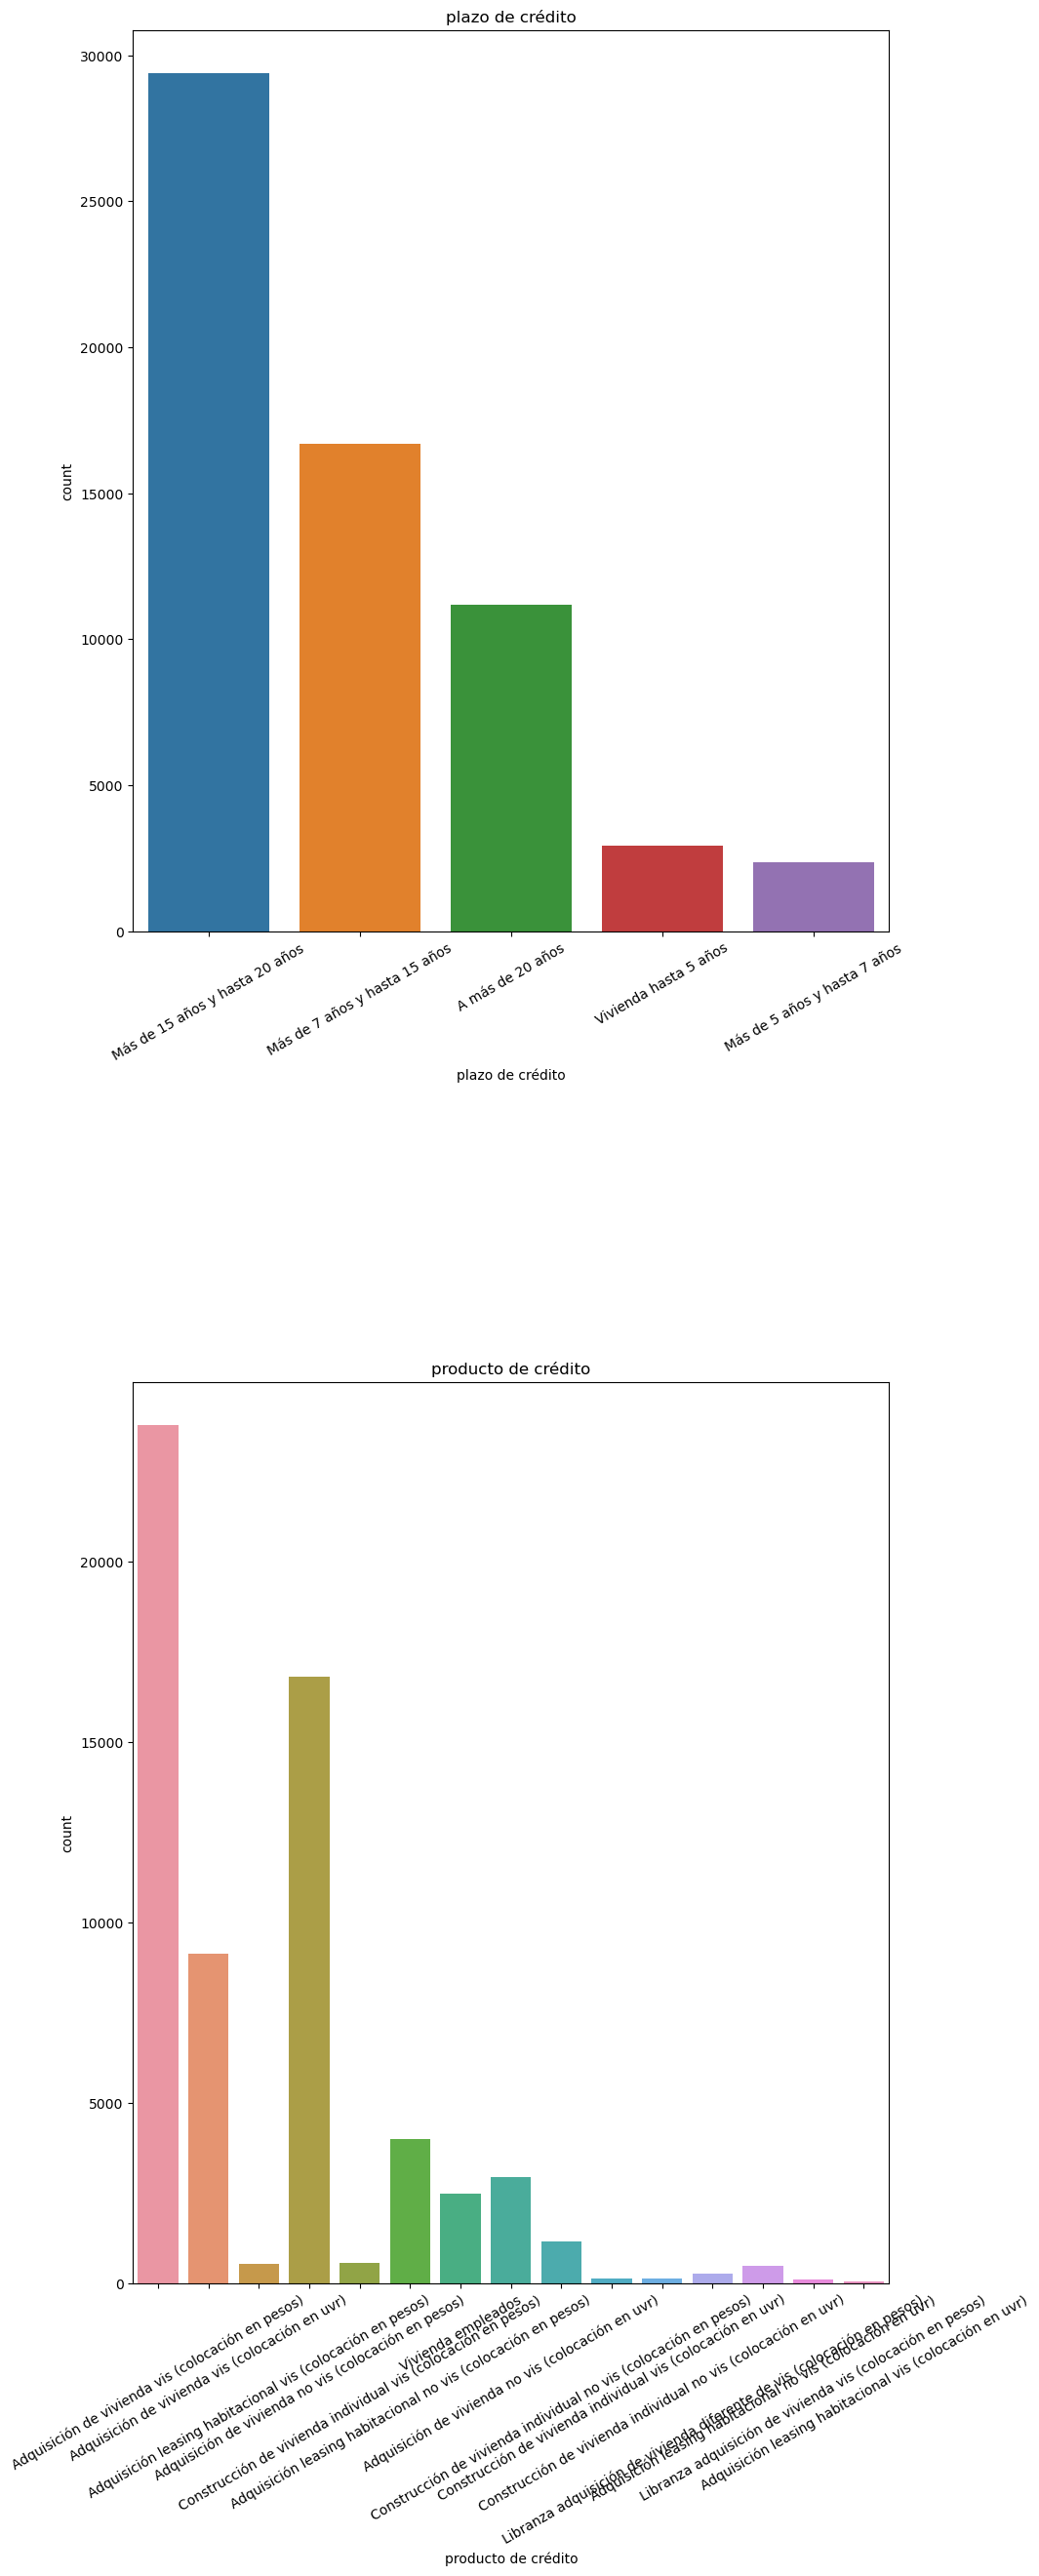

In [81]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['plazo de crédito', 'producto de crédito']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [99]:
df['no_es_vis'] =  df['producto de crédito'].str.contains(r'\bno vis\b', case=False)
df[['producto de crédito', 'es_vis']]

,producto de crédito,es_vis
0,Adquisición de vivienda vis (colocación en pesos),False
1,Adquisición de vivienda vis (colocación en pesos),False
2,Adquisición de vivienda vis (colocación en pesos),False
3,Adquisición de vivienda vis (colocación en uvr),False
4,Adquisición de vivienda vis (colocación en pesos),False
...,...,...
62588,Adquisición de vivienda vis (colocación en pesos),False
62589,Adquisición de vivienda vis (colocación en pesos),False
62590,Adquisición de vivienda no vis (colocación en ...,True
62591,Adquisición de vivienda vis (colocación en pesos),False


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

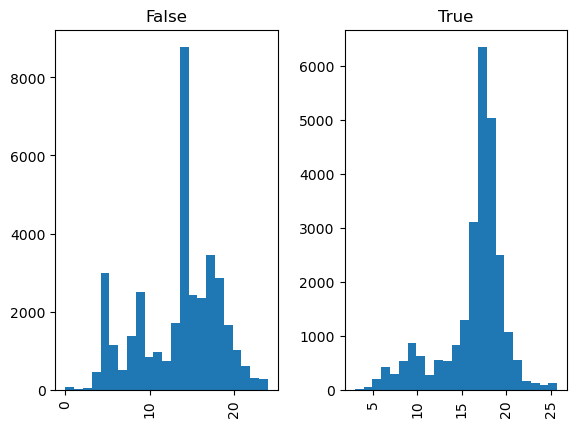

In [100]:
df.hist(column='tasa_efectiva_promedio_ponderada', by='is_vis', bins=23)

<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='no_es_vis'>

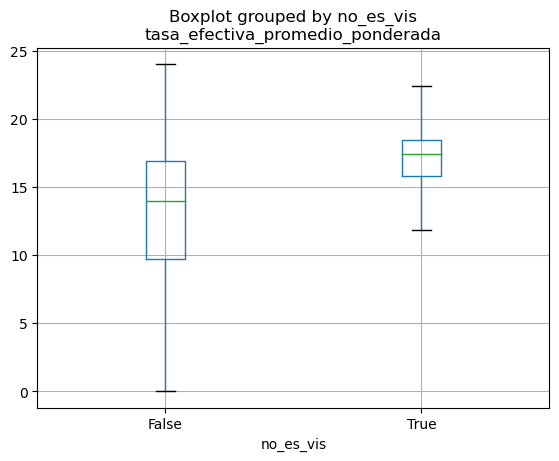

In [101]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='no_es_vis', showfliers=False)

In [109]:
from scipy.stats import ttest_ind
import math

vis_df = df[df.no_es_vis == False]
no_vis_df = df[df.no_es_vis == True]

vis_mean = vis_df.tasa_efectiva_promedio_ponderada.dropna().mean()
no_vis_mean = no_vis_df.tasa_efectiva_promedio_ponderada.dropna().mean()

""" # Calcular las desviaciones estándar de los precios de los vinos de Washington y California
vis_std = vis_df.tasa_efectiva_promedio_ponderada.dropna().std()
no_vis_std = no_vis_df.tasa_efectiva_promedio_ponderada.dropna().std()

# Calcular el tamaño de las muestras de los precios de los vinos de Washington y California
vis_n = len(vis_df.tasa_efectiva_promedio_ponderada.dropna())
no_vis_n = len(no_vis_df.tasa_efectiva_promedio_ponderada.dropna())

# Calcular el estadístico t
t_stat = (vis_mean - no_vis_mean) / math.sqrt((vis_std**2 / vis_n) + (no_vis_std**2 / no_vis_n))

# Calcular los grados de libertad
df = vis_n + no_vis_n - 2

# Calcular el valor crítico de la distribución t de Student para un nivel de significancia dado (e.g., 0.05)
critical_value = 2.048  # Para un nivel de significancia de 0.05 y df = 100

# Comparar el estadístico t con el valor crítico
if t_stat > critical_value:
    print("Hay una diferencia significativa entre el precio de los vinos de Washington y California.")
else:
    print("No hay una diferencia significativa entre el precio de los vinos de Washington y California.")
no_vis_mean = no_vis_df.tasa_efectiva_promedio_ponderada.dropna().mean()
# Perform t-test
t_stat, p_value = ttest_ind(vis_df.tasa_efectiva_promedio_ponderada.dropna(), no_vis_mean.tasa_efectiva_promedio_ponderada.dropna())

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference between the tasa_efectiva_promedio_ponderados of wines from Washington and California.")
else:
    print("There is no significant difference between the tasa_efectiva_promedio_ponderados of wines from Washington and California.") """



AttributeError: 'int' object has no attribute 'no_es_vis'